In [1]:
import pandas as pd
import numpy as np

Importa base

In [2]:
df= pd.read_csv('gs://bucket-tcc-fia-mba/ABT/ABT_TARGET.csv')

Cria target

In [3]:
df['TARGET'] =  (df['TARGET_MT9']+df['TARGET_LP9']).apply(lambda x: 1 if x>0 else 0)

Dropa variáveis que podem causar multicolinearidade (NU_PRESENTES_9EF - já existe a variável de taxa de presentes).
NIVEL_SOCIO_ECONOMICO aprensentou mudança na distribuição ao longo dos anos, portanto decidi não usá-la.

In [4]:
df.drop(columns=['NU_PRESENTES_9EF', 'NIVEL_SOCIO_ECONOMICO', 'ID_ESCOLA','TARGET_MT9', 'TARGET_LP9'],inplace=True)

Verifica nulos

In [5]:
df.iloc[:,:7].isnull().sum()

ID_PROVA_BRASIL              0
ID_UF                        0
ID_MUNICIPIO                 0
ID_DEPENDENCIA_ADM           0
ID_LOCALIZACAO               0
PC_FORMACAO_DOCENTE_FINAL    4
NU_MATRICULADOS_CENSO_9EF    0
dtype: int64

In [6]:
df['PC_FORMACAO_DOCENTE_FINAL'].mean()

54.718251707275584

Substitui valor nulo pela média

In [7]:
df['PC_FORMACAO_DOCENTE_FINAL'].fillna(df['PC_FORMACAO_DOCENTE_FINAL'].mean(),inplace=True)

In [8]:
df.iloc[:,:7].isnull().sum()

ID_PROVA_BRASIL              0
ID_UF                        0
ID_MUNICIPIO                 0
ID_DEPENDENCIA_ADM           0
ID_LOCALIZACAO               0
PC_FORMACAO_DOCENTE_FINAL    0
NU_MATRICULADOS_CENSO_9EF    0
dtype: int64

Correlação das variáveis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
corr = df.corr()

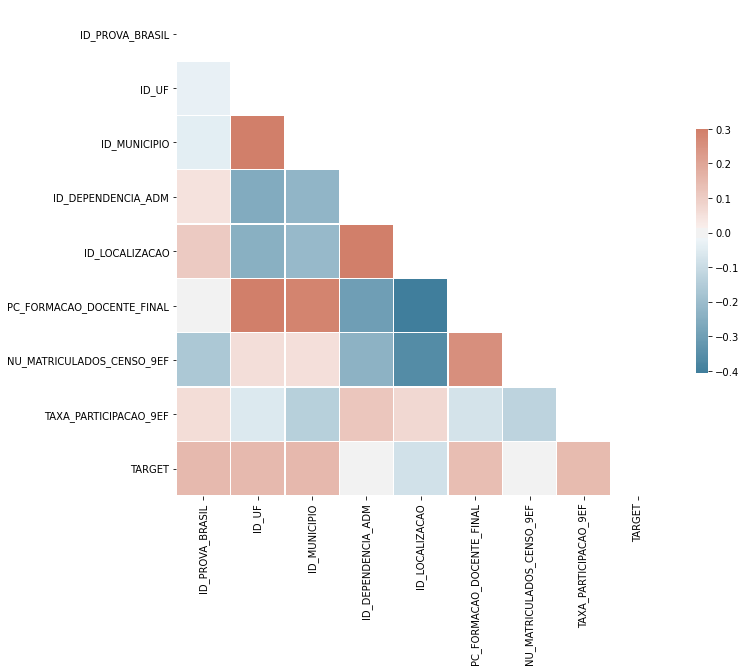

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Separa variáveis categóricas que precisam ter suas dummies criadas.

In [12]:
categoricas = df.iloc[:,8:-1].columns
categoricas

Index(['TX_RESP_Q007', 'TX_RESP_Q008', 'TX_RESP_Q009', 'TX_RESP_Q010',
       'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014',
       'TX_RESP_Q015', 'TX_RESP_Q016',
       ...
       'PROF_MT_TX_RESP_Q116', 'PROF_MT_TX_RESP_Q117', 'PROF_MT_TX_RESP_Q118',
       'PROF_MT_TX_RESP_Q119', 'PROF_MT_TX_RESP_Q120', 'PROF_MT_TX_RESP_Q121',
       'PROF_MT_TX_RESP_Q122', 'PROF_MT_TX_RESP_Q123', 'PROF_MT_TX_RESP_Q124',
       'PROF_MT_TX_RESP_Q125'],
      dtype='object', length=429)

Cria dummies

In [13]:
df_dummies = pd.get_dummies(df,
                    columns=categoricas,
                    drop_first=True,
                    prefix=categoricas,
                    prefix_sep='_')
df_dummies.shape

(98992, 1330)

In [14]:
df_dummies.head()

,ID_PROVA_BRASIL,ID_UF,ID_MUNICIPIO,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_FINAL,NU_MATRICULADOS_CENSO_9EF,TAXA_PARTICIPACAO_9EF,TARGET,TX_RESP_Q007_B,...,PROF_MT_TX_RESP_Q124_B,PROF_MT_TX_RESP_Q124_C,PROF_MT_TX_RESP_Q124_D,PROF_MT_TX_RESP_Q124_E,PROF_MT_TX_RESP_Q124_F,PROF_MT_TX_RESP_Q125_B,PROF_MT_TX_RESP_Q125_C,PROF_MT_TX_RESP_Q125_D,PROF_MT_TX_RESP_Q125_E,PROF_MT_TX_RESP_Q125_F
0,2013,11,1100015,2,1,54.1,113.0,0.858407,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2013,11,1100015,3,2,34.5,31.0,0.806452,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2013,11,1100015,3,2,19.7,23.0,0.869565,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,11,1100015,3,2,39.7,34.0,0.794118,0,1,...,0,0,0,1,0,0,0,1,0,0
4,2013,11,1100015,2,1,38.9,92.0,0.717391,0,1,...,0,0,0,1,0,0,0,1,0,0


### Separa bases de teste e treino.

O treino será feito com as bases de 2013 e 2015. E o teste com a base de 2017.

In [15]:
teste = df_dummies[df_dummies['ID_PROVA_BRASIL']==2017]

In [16]:
treino = df_dummies[df_dummies['ID_PROVA_BRASIL']!=2017]

Separa base de variáveis e target

In [17]:
treino_y = treino['TARGET']
treino_x = treino.drop(columns=['TARGET', 'ID_PROVA_BRASIL'])

In [18]:
treino_x.head(1)

,ID_UF,ID_MUNICIPIO,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_FINAL,NU_MATRICULADOS_CENSO_9EF,TAXA_PARTICIPACAO_9EF,TX_RESP_Q007_B,TX_RESP_Q007_C,TX_RESP_Q007_D,...,PROF_MT_TX_RESP_Q124_B,PROF_MT_TX_RESP_Q124_C,PROF_MT_TX_RESP_Q124_D,PROF_MT_TX_RESP_Q124_E,PROF_MT_TX_RESP_Q124_F,PROF_MT_TX_RESP_Q125_B,PROF_MT_TX_RESP_Q125_C,PROF_MT_TX_RESP_Q125_D,PROF_MT_TX_RESP_Q125_E,PROF_MT_TX_RESP_Q125_F
0,11,1100015,2,1,54.1,113.0,0.858407,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
teste_y = teste['TARGET']
teste_x = teste.drop(columns=['TARGET', 'ID_PROVA_BRASIL'])
# .iloc[:,:516]

In [20]:
treino_x.shape, treino_y.shape

((61937, 1328), (61937,))

In [21]:
teste_x.shape, teste_y.shape

((37055, 1328), (37055,))

### Treinamento do Modelo

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
lr = LogisticRegression(penalty='none', solver='newton-cg')

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    lr.fit(treino_x, treino_y)
    predito_y= lr.predict(teste_x)
    print(lr.score(teste_x, teste_y))
    print(confusion_matrix(predito_y, teste_y))
    print(classification_report(predito_y, teste_y))

0.8518148697881528
[[30799  5238]
 [  253   765]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     36037
           1       0.13      0.75      0.22      1018

    accuracy                           0.85     37055
   macro avg       0.56      0.80      0.57     37055
weighted avg       0.97      0.85      0.90     37055



Como vimos, a base é desbalanceada. E o resultado do modelo foi bem ruim. Por isso vou testar 2 métodos diferentes para tentar ajustar o erro: 

* Oversampling: cria novos registros aleatórios da variável target, aumentando o volume de dados;
* Undersampling: reduz a quantidade de registros da classe maioritária para a mesma quantidade da classe minoritária.

##### Over Sampling

In [24]:
from imblearn.over_sampling import SMOTE
# tratando desbalanceamento. 1 para oversampling, gerando novos dados para a variável target =1
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=42)
treino_x_os, treino_y_os = smote.fit_sample(treino_x, treino_y.ravel())

In [25]:
treino_x_os.shape, treino_y_os.shape

((114966, 1328), (114966,))

##### Under Sampling

Separa indices aleatórios da classe 0 (aprendizado não-adequado) do mesmo tamanho da classe 1 (aprendizado adequado)

Separa indices do teste

In [26]:
nao_adequado_indices = teste[teste['TARGET'] == 0].index     
adequado_indices = teste[teste['TARGET'] == 1].index       
adequado = len(teste[teste['TARGET'] == 1])
random = np.random.choice( nao_adequado_indices, adequado , replace=False)  
teste_indices_us = np.concatenate([adequado_indices,random])

Separa indices do treino

In [27]:
nao_adequado_indices = treino[treino['TARGET'] == 0].index     
adequado_indices = treino[treino['TARGET'] == 1].index       
adequado = len(treino[treino['TARGET'] == 1])
random = np.random.choice( nao_adequado_indices, adequado , replace=False)  
treino_indices_us = np.concatenate([adequado_indices,random])

In [28]:
len(treino_indices_us), len(teste_indices_us)

(8908, 12006)

In [29]:
treino_us =  treino.loc[treino_indices_us]
teste_us = teste.loc[teste_indices_us]

Cria bases de X e Y para treinamento do modelo

In [30]:
treino_y_us = treino_us['TARGET']
treino_x_us = treino_us.drop(columns=['TARGET', 'ID_PROVA_BRASIL'])
# .iloc[:,:516]

In [31]:
treino_y_us.shape, treino_x_us.shape

((8908,), (8908, 1328))

In [32]:
teste_y_us = teste_us['TARGET']
teste_x_us = teste_us.drop(columns=['TARGET', 'ID_PROVA_BRASIL'])
# .iloc[:,:516]

In [33]:
teste_x_us.shape, teste_y_us.shape

((12006, 1328), (12006,))

#### Regressão Logistica

Over Sampling

In [34]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    lr.fit(treino_x_os, treino_y_os)
    predito_y= lr.predict(teste_x)
    print(lr.score(teste_x, teste_y))
    print(confusion_matrix(predito_y, teste_y))
    print(classification_report(predito_y, teste_y))

0.8490891917420051
[[30579  5119]
 [  473   884]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     35698
           1       0.15      0.65      0.24      1357

    accuracy                           0.85     37055
   macro avg       0.57      0.75      0.58     37055
weighted avg       0.95      0.85      0.89     37055



Under Sampling

In [35]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    lr.fit(treino_x_us, treino_y_us)
    predito_y= lr.predict(teste_x_us)
    print(lr.score(teste_x_us, teste_y_us))
    print(confusion_matrix(predito_y, teste_y_us))
    print(classification_report(predito_y, teste_y_us))

0.7053973013493253
[[4538 2072]
 [1465 3931]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      6610
           1       0.65      0.73      0.69      5396

    accuracy                           0.71     12006
   macro avg       0.71      0.71      0.70     12006
weighted avg       0.71      0.71      0.71     12006



### Árvore de Decisão

In [36]:
dt = DecisionTreeClassifier()
dt.fit(treino_x_os, treino_y_os)
predito_y= dt.predict(teste_x)
print(dt.score(teste_x, teste_y))
print(confusion_matrix(predito_y, teste_y))
print(classification_report(predito_y, teste_y))

0.7843206045068142
[[27853  4793]
 [ 3199  1210]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     32646
           1       0.20      0.27      0.23      4409

    accuracy                           0.78     37055
   macro avg       0.55      0.56      0.55     37055
weighted avg       0.81      0.78      0.80     37055



In [37]:
dt.fit(treino_x_us, treino_y_us)
predito_y= dt.predict(teste_x_us)
print(dt.score(teste_x_us, teste_y_us))
print(confusion_matrix(predito_y, teste_y_us))
print(classification_report(predito_y, teste_y_us))

0.6347659503581543
[[4155 2537]
 [1848 3466]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      6692
           1       0.58      0.65      0.61      5314

    accuracy                           0.63     12006
   macro avg       0.63      0.64      0.63     12006
weighted avg       0.64      0.63      0.64     12006



Importancia das variáveis

In [38]:
tb_importancia = pd.concat((pd.Series(treino_x_us.columns,name='Variáveis'),pd.Series(dt.feature_importances_,name='Importancia')),axis=1)
tb_importancia.sort_values(by='Importancia', ascending=False).head(10)

,Variáveis,Importancia
0,ID_UF,0.125364
6,TAXA_PARTICIPACAO_9EF,0.117697
5,NU_MATRICULADOS_CENSO_9EF,0.022180
1,ID_MUNICIPIO,0.020758
363,DIRETOR_TX_RESP_Q041_B,0.019630
4,PC_FORMACAO_DOCENTE_FINAL,0.018174
1232,PROF_MT_TX_RESP_Q106_E,0.014782
791,PROF_LP_TX_RESP_Q095_D,0.009081
86,TX_RESP_Q036_B,0.005065
365,DIRETOR_TX_RESP_Q041_D,0.004989


In [39]:
# tn, fp, fn, tp = confusion_matrix(teste_y, previsoes).ravel()

# tn, fp, fn, tp

# recall =tp/(tp+fn)
# precision=tp/(tp+fp)
# acc=(tp+tn)/(tp+tn+fp+fn)
# print('Recall: ', recall , 'Precision: ' , precision , 'Accuracy: ' , acc)
